# Quanvolutional Neural Networks¶

### CNN - classical convolution

A convolutional neural network (CNN) is a classical machine learning model used for image processing tasks. Instead of applying a global function to the entire input data, a CNN utilizes a convolution layer to apply a local convolution to small, localized regions of the image. This involves sequentially processing small local regions with the same kernel. The results from each region are associated with different channels of a single output pixel. Collectively, these output pixels form a new image-like object, which can be further processed by additional layers in the network.

Image processing tasks such as classification, object detection, and segmentation can be performed by a CNN. 
CNNs automatically learn hierarchical features from raw image data, making them effective for various visual tasks.

### QCNN

With the advent of quantum computers, it is possible to implement Quantum convolutional neural networks (QCNNs) which apply quantum operations to process image data. They aim to enhance classical convolutional neural networks (CNNs) by exploiting quantum parallelism and entanglement.

QCNN's can:

- Quantum variational circuits can extend the convolutional neural network (CNN) concept.
- Embed small regions of the input image (e.g., 2 × 2 squares) into a quantum circuit using parameterized rotations.
- Perform a quantum computation on the system with a unitary \(U\), which can be a variational or random circuit.
- Measure the quantum system to obtain classical expectation values.
- Map each expectation value to a different channel of an output pixel, similar to a classical convolution layer.
- Scan the full input image by iterating this procedure over different regions, creating a multi-channel output object.
- Follow the quantum convolution with additional quantum or classical layers.

Characteristics and capabilities of QCNN's:

1. **Quantum Convolutions:** QCNNs use quantum gates to perform convolutions, extracting features from images.

2. **Entanglement and Superposition:** By leveraging quantum properties, QCNNs can process multiple states simultaneously, enabling parallel feature extraction and reducing the number of parameters compared to classical CNNs.

3. **Quantum Pooling:** QCNNs implement quantum versions of pooling layers to reduce the dimensionality of data while preserving essential features.

4. **Hybrid Architectures:** Often, QCNNs are integrated with classical neural networks to take advantage of both quantum and classical processing capabilities.


### Differences between CNN's and QCNN's

The main difference with respect to a classical convolution is that a quantum circuit can generate highly complex kernels whose computation could be, at least in principle, classically intractable.

The main differences between classical Convolutional Neural Networks (CNNs) and Quantum Neural Networks (QNNs), specifically Quantum Convolutional Neural Networks (QCNNs), as applied to images are:

#### 1. **Fundamental Operations:**
- **CNNs:** Operate using classical operations such as convolution, pooling, and fully connected layers. These networks process image data through filters to detect features like edges, textures, and shapes.
- **QNNs/QCNNs:** Utilize quantum operations like quantum gates, entanglement, and superposition. Quantum convolution uses quantum circuits to extract features, aiming to exploit quantum parallelism and interference effects.

#### 2. **Data Representation:**
- **CNNs:** Process data in classical bits, where each pixel value is processed sequentially or in parallel.
- **QNNs/QCNNs:** Encode data into quantum bits (qubits), which can represent and process multiple states simultaneously due to superposition, potentially offering exponential speedup for certain tasks.

#### 3. **Computational Complexity:**
- **CNNs:** Require significant computational resources, especially for large-scale images and deep networks.
- **QNNs/QCNNs:** Aim to reduce the computational complexity by leveraging quantum mechanics. They can process data with fewer parameters and layers.

#### 4. **Learning and Training:**
- **CNNs:** Training involves backpropagation and gradient descent algorithms.
- **QNNs/QCNNs:** Training often involves quantum versions of these algorithms, such as quantum backpropagation and variational quantum algorithms.

#### 5. **Noise and Errors:**
- **CNNs:** Less prone to noise in the computational process due to mature error-correcting techniques and stable classical hardware.
- **QNNs/QCNNs:** Quantum systems are highly susceptible to noise and decoherence, which can affect the fidelity of quantum operations and overall performance.

#### 6. **Scalability:**
- **CNNs:** Highly scalable with current technology, can handle very large datasets and complex models.
- **QNNs/QCNNs:** Potentially more scalable in theory due to quantum parallelism.

#### 7. **Applications:**
- **CNNs:** Used in image recognition, object detection, medical imaging, and many other computer vision tasks.
- **QNNs/QCNNs:** Still in experimental stages with promising theoretical advantages, particularly in areas where quantum speedup can be realized.

### Main advantage of QCNN's:

The main advantage over classical convolution is that a quantum circuit can create extremely complex kernels, making their computation potentially intractable for classical systems.

# This tutorial:

Implementation of the Quanvolutional Neural Network, a quantum machine learning model originally introduced in Henderson et al. (2019).

Approach:

A **fixed non-trainable quantum circuit** is used as a “quanvolution” kernel. The subsequent classical layers are trained for the classification problem at hand (here: classification of MNIST dataset).

PennyLane, however, allows the **quantum kernel to be trained** by evaluating gradients of quantum circuits.

# 0. Environment, imports, hyperparameters, dataset

## Environment, imports

In [1]:
pip install -q pennylane


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: /opt/.qbraid/environments/qbraid_000000/pyenv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -q tensorflow


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
#This Python code requires PennyLane with the 
#TensorFlow interface and the plotting library 
#matplotlib.

import pennylane as qml
import numpy as np
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [9]:
pip install -q scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
import sklearn as skl
from sklearn import *
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Hyperparameters of the model

In [23]:
#Setting of the main hyper-parameters of the model¶
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 50    # Size of the train dataset
n_test = 30     # Size of the test dataset

SAVE_PATH = "./_static/demonstration_assets/quanvolution/"  # Data saving folder
PREPROCESS = True           
# If False, skip quantum processing and load data 
# from SAVE_PATH

np.random.seed(0)           
# Seed for NumPy random number generator

tf.random.set_seed(0)       
# Seed for TensorFlow random number generator

## Loading of the MNIST dataset¶

The MNIST dataset is imported from Keras. It's size is subsequently reduced to 50 images for training and 30 images for testing purposes.

The pixels of the images have values between 0 and 255. These are normalized to values between 0 and 1.


In [24]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis],requires_grad=False)
test_images = np.array(test_images[..., tf.newaxis],requires_grad=False)

In [32]:
print(train_labels)

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


# 1. Quantum model

## Quantum circuit as a convolution kernel¶

A PennyLane **default.qubit device** is initialized to simulate a system of 4 qubits. 

The associated **qnode** represents the quantum circuit:

- an embedding layer of local Ry rotations (with angles scaled by a factor of π)
- a random circuit of n_layers
- a final measurement in the computational basis, estimating 4 expectation values

In [25]:
dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

## Circuit visualizations

In [18]:
# Sample input (random angles phi for Ry)
phi = np.random.rand(4)

The first two circuits show the four qubits with one Ry gate each, followed by a random layer of gates.

The third circuit allows a look into the random layer.

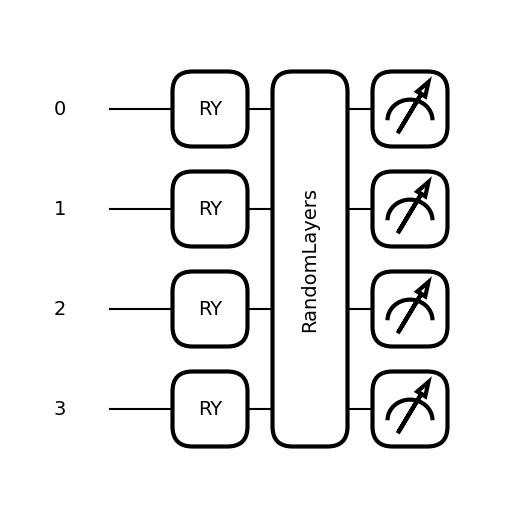

In [19]:
# Draw the circuit using Matplotlib
fig, ax = qml.draw_mpl(circuit)(phi)
plt.show()

In [21]:
# Draw the circuit
drawing = qml.draw(circuit)(phi)
print(drawing)

# Custom plotting using Matplotlib (example visualization)
def plot_circuit(drawing):
    fig, ax = plt.subplots()
    ax.text(0.5, 0.5, drawing, fontsize=12, ha='center', wrap=True)
    ax.axis('off')
    plt.show()

#plot_circuit(drawing)

0: ──RY(0.33)─╭RandomLayers(M0)─┤  <Z>
1: ──RY(1.49)─├RandomLayers(M0)─┤  <Z>
2: ──RY(0.59)─├RandomLayers(M0)─┤  <Z>
3: ──RY(2.32)─╰RandomLayers(M0)─┤  <Z>

M0 = 
[[3.72495259 5.30467815 5.3906313  5.32343968]]


In [20]:
# Draw the circuit
drawer = qml.draw(circuit, expansion_strategy="device")
print(drawer(phi))

0: ──RY(0.33)──────────────────────────────────┤  <Z>
1: ──RY(1.49)──RY(3.72)─╭●─────────────────────┤  <Z>
2: ──RY(0.59)──RX(5.30)─│───RZ(5.39)──RX(5.32)─┤  <Z>
3: ──RY(2.32)───────────╰X─────────────────────┤  <Z>


## Convolution using quantum circuit

The function **quanv** defines the convolution scheme:

- an image is divided into squares of 2×2 pixels
- each square is processed by the quantum circuit
- the 4 expectation values are mapped into 4 different channels of a single output pixel.

The resolution of the input image is cut in half. This cirresponds to a classical CNN with a 2×2 kernel and a stride of 2.
 .

In [26]:
def quanv(image):
    """Convolves the input image with many applications 
    of the same quantum circuit."""
    
    out = np.zeros((14, 14, 4))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

## Quantum pre-processing of the dataset: apply quantum convolution to images

In this tutorial, the quantum convolution layer is not trained.

Instead, the quantum convolution layer is applied to all images in a “pre-processing” stage, which are then saved for later use. 

Later on, an entirely classical model will be trained and tested on the pre-processed dataset in order to avoid a repetition of the quantum convolutin.


In [24]:
if PREPROCESS == True:
    # if TRUE apply quantum convolution
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(train_images):
        print("{}/{}        ".format(idx + 1, n_train), end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(test_images):
        print("{}/{}        ".format(idx + 1, n_test), end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
    np.save(SAVE_PATH + "q_test_images.npy", q_test_images)

Quantum pre-processing of train images:
50/50        
Quantum pre-processing of test images:


In [11]:
# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

Quantum pre-processing of train images:
1/50
2/50
3/50
4/50
5/50
6/50
7/50
8/50
9/50
10/50
11/50
12/50
13/50
14/50

## Visualization of pre-processed images

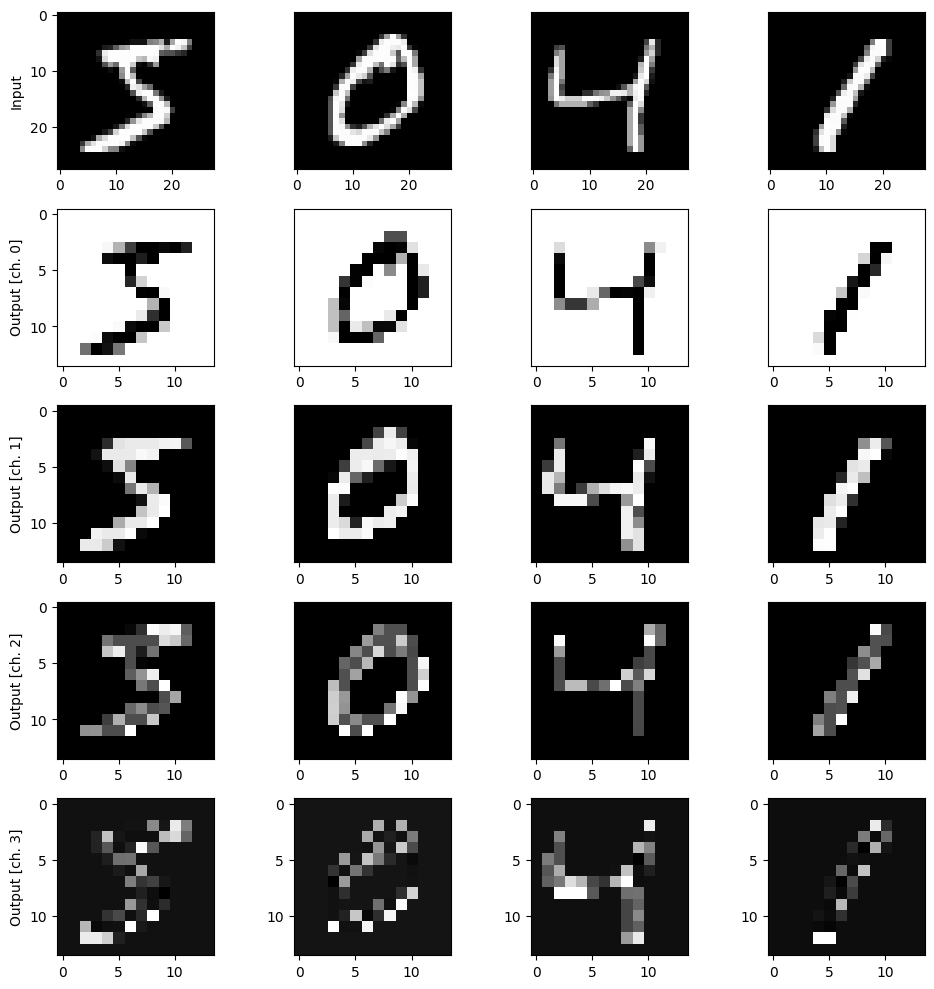

In [28]:
#Let us visualize the effect of the quantum convolution
# layer on a batch of samples:

n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

Below each input image, one can see the 4 output channels generated by the quantum convolution. The global shapes of the images are preserved across channels.

From channel 0 to 3 there is:
- downsampling of the resolution
- local distortion introduced by the quantum kernel

# 2. Hybrid quantum-classical model¶

The images resulting from the application of the quantum convolution layer are fed into a classical neural network that will be trained to classify the 10 different digits of the MNIST dataset.

NN:
- fully connected layer with 10 output nodes
- final softmax activation function

Optimization:
- stochastic-gradient-descent

Loss function:
- cross-entropy loss function.

In [27]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

## Training: Model _with_ quantum preprocessing

We first initialize an instance of the model, then we train and validate it with the **dataset that has been already pre-processed by a quantum convolution.**

In [ ]:
q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

## Training: Model _without_ quantum preprocessing

In order to compare the results achievable with and without the quantum convolution layer, we initialize also a “classical” instance of the **model that will be directly trained and validated with the raw MNIST images (i.e., without quantum pre-processing).**



In [ ]:
c_model = MyModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

# 3. Results

## Accuracy evolution

The test accuracy and the test loss with respect to the number of training epochs show that the **quantum layer-preprocessed** data provide for better accuracy than the **non-preprocessed** data.

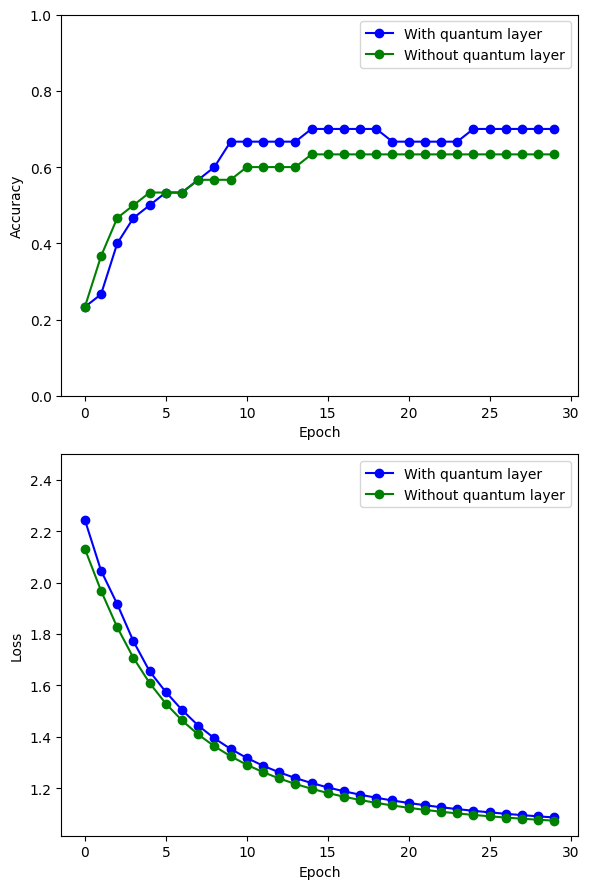

In [36]:
import matplotlib.pyplot as plt

#plt.style.use("seabirn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()


## Accuracy evolution: training vs. validation

Here one can see that the accuracy during training approaches 100 %, while during validation the accuracy approaches 60 to 70 %.

The reason for this could be that we have used only a small dataset for training.

If this pattern were observed for a large dataset, one could say that we have overfitting during the training phase leading to a lack of generalization.

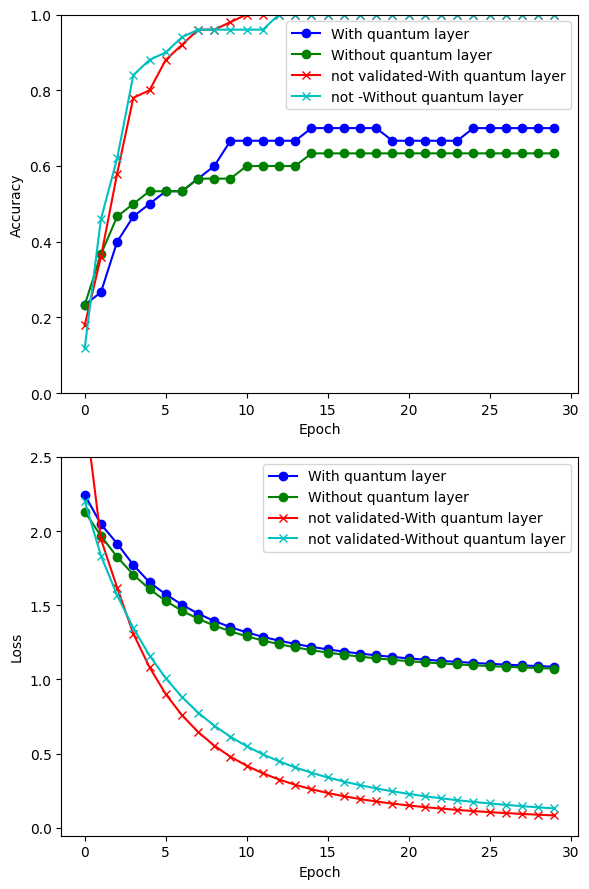

In [43]:
import matplotlib.pyplot as plt

#plt.style.use("seabirn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.plot(q_history.history["accuracy"], "-xr", label="not validated-With quantum layer")
ax1.plot(c_history.history["accuracy"], "-xc", label="not validated-Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.plot(q_history.history["loss"], "-xr", label="not validated-With quantum layer")
ax2.plot(c_history.history["loss"], "-xc", label="not validated-Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()


## Confusion matrix

In [9]:
pip install -q scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import sklearn as skl
from sklearn import *
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

This confusion matrix shows the model performed on each class, highlighting where the model made mistakes.

Off-diagonal elements, i.e. misclassifications, are marked in red.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


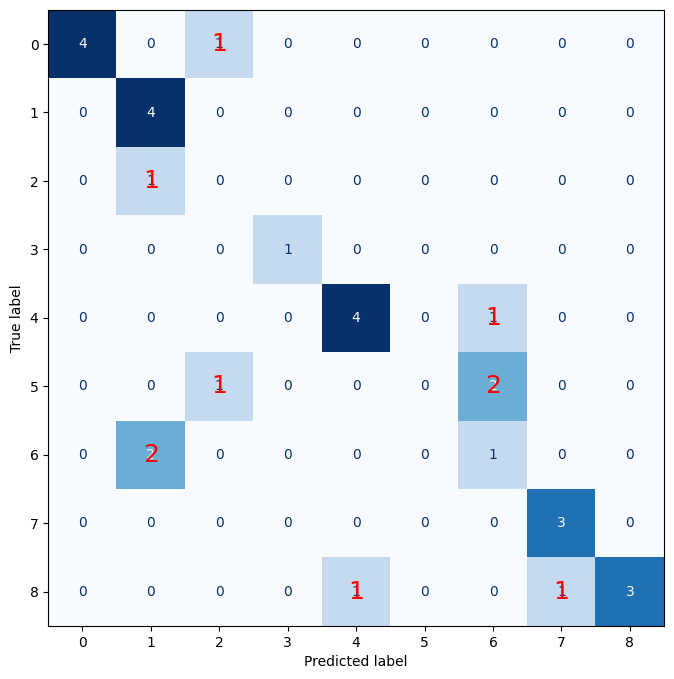

In [16]:
# Step 1: Make predictions
predictions = q_model.predict(q_test_images)

# Step 2: Convert predictions to class labels
predicted_labels = predictions.argmax(axis=1)

# Step 3: Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Step 4: Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)

# Step 5: Highlight the incorrectly classified entries when they are non-zero
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i != j and cm[i, j] > 0:  # Highlight only the non-zero misclassified entries
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="red", fontsize=18)

plt.show()

Other possible analyses: precision, recall, and F1 score.

# 4.References
Maxwell Henderson, Samriddhi Shakya, Shashindra Pradhan, Tristan Cook. “Quanvolutional Neural Networks: Powering Image Recognition with Quantum Circuits.” arXiv:1904.04767, 2019.